In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mplhep as hep
hep.style.use("CMS")

colors=['#762a83','#af8dc3','#e7d4e8','#d9f0d3','#7fbf7b','#1b7837']
markers = [ 'o', '^','s', 'D', '*']

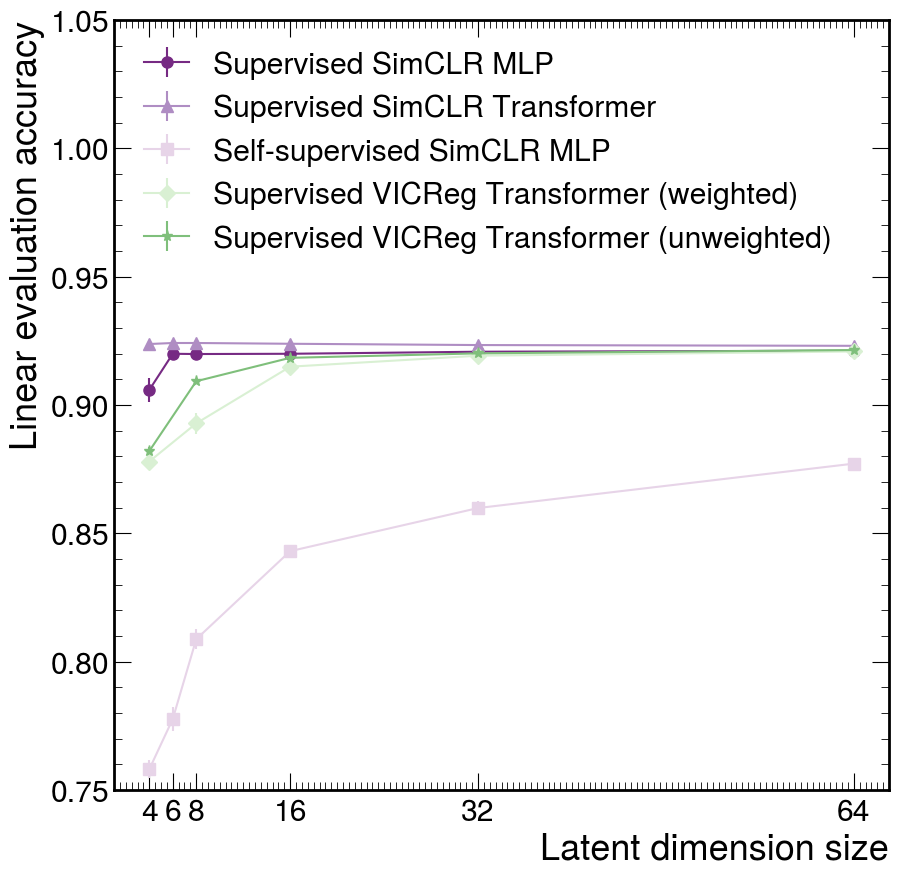

In [2]:
# Linear evaluation values
l1 = np.load('../data/supervised_SimCLR_MLP_lineval.npz', allow_pickle=True)
l2 = np.load('../data/supervised_SimCLR_transformer_lineval.npz', allow_pickle=True)
l3 = np.load('../data/selfsupervised_SimCLR_MLP_lineval.npz', allow_pickle=True)
l4 = np.load('../data/vicreg_weighted_linear_eval.npz', allow_pickle=True)
l5 = np.load('../data/vicreg_unweighted_linear_eval.npz', allow_pickle=True)

fig, ax = plt.subplots()
plt.errorbar(l1["embedding"], l1["accuracy"], l1["error"], c=colors[0],marker=markers[0],markersize=8, label='Supervised SimCLR MLP')
plt.errorbar(l2["embedding"], l2["accuracy"], l2["error"], c=colors[1],marker=markers[1],markersize=8, label='Supervised SimCLR Transformer')
plt.errorbar(l3["embedding"], l3["accuracy"], l3["error"], c=colors[2],marker=markers[2],markersize=8, label='Self-supervised SimCLR MLP')
plt.errorbar(l4["embedding"], l4["accuracy"]/100, l4["error"]/100, c=colors[3],marker=markers[3],markersize=8, label='Supervised VICReg Transformer (weighted)')
plt.errorbar(l5["embedding"], l5["accuracy"]/100, l5["error"]/100, c=colors[4],marker=markers[4],markersize=8, label='Supervised VICReg Transformer (unweighted)')

plt.ylim(.75, 1.05)

plt.xlabel('Latent dimension size')
plt.ylabel('Linear evaluation accuracy')
plt.xticks(l1["embedding"])
plt.legend(loc='upper left')
plt.savefig("../plots/lineval.pdf", format="pdf")
plt.savefig("../plots/lineval.png", format="png")

In [3]:
# p'embedding']: the embedding dimension (In this case just the 6D leading object pTs). For the actual embeddings this includes all of the dimensions.
# p['pvals']: The first dimension of the pvals array refers to the signal type: 4-7
# The second dimension refers to the three injection rates: 0.1, 0.5, 1%
# The third dimension is the power P(Z>3), the upper error and the lower error
# For more info, see p['info_for_pvals_array']

# p-values
p1 = np.load('../data/noEmbedding_pvals_asym.npz', allow_pickle=True)
p2 = np.load('../data/6Dleadingobject_pvals_asym.npz', allow_pickle=True)
p3 = np.load('../data/supervised_SimCLR_MLP_pvals_asym.npz', allow_pickle=True)
p4 = np.load('../data/supervised_SimCLR_transformer_pvals_asym.npz', allow_pickle=True)
p5 = np.load('../data/selfsupervised_SimCLR_MLP_pvals_asym.npz', allow_pickle=True)

p6 = np.load('../data/powers_VAE6D.npz', allow_pickle=True)
p7 = np.load('../data/weighted_vicreg_transformer_pvals_asym.npz', allow_pickle=True)
p8 = np.load('../data/unweighted_vicreg_transformer_pvals_asym.npz', allow_pickle=True)

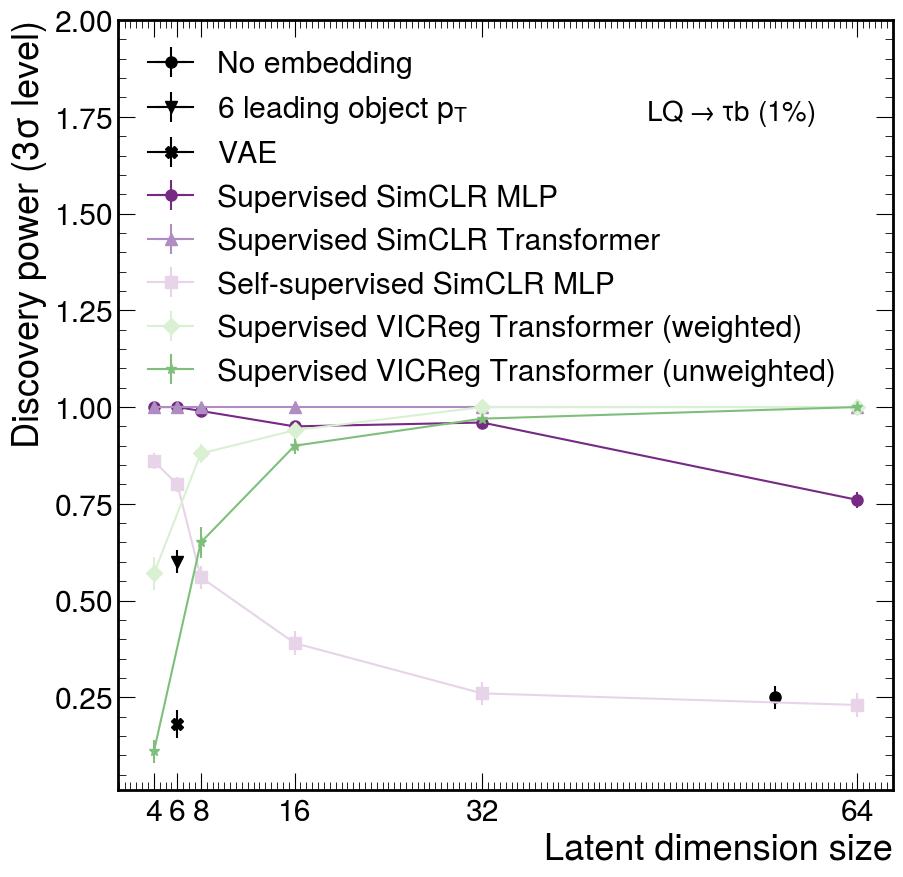

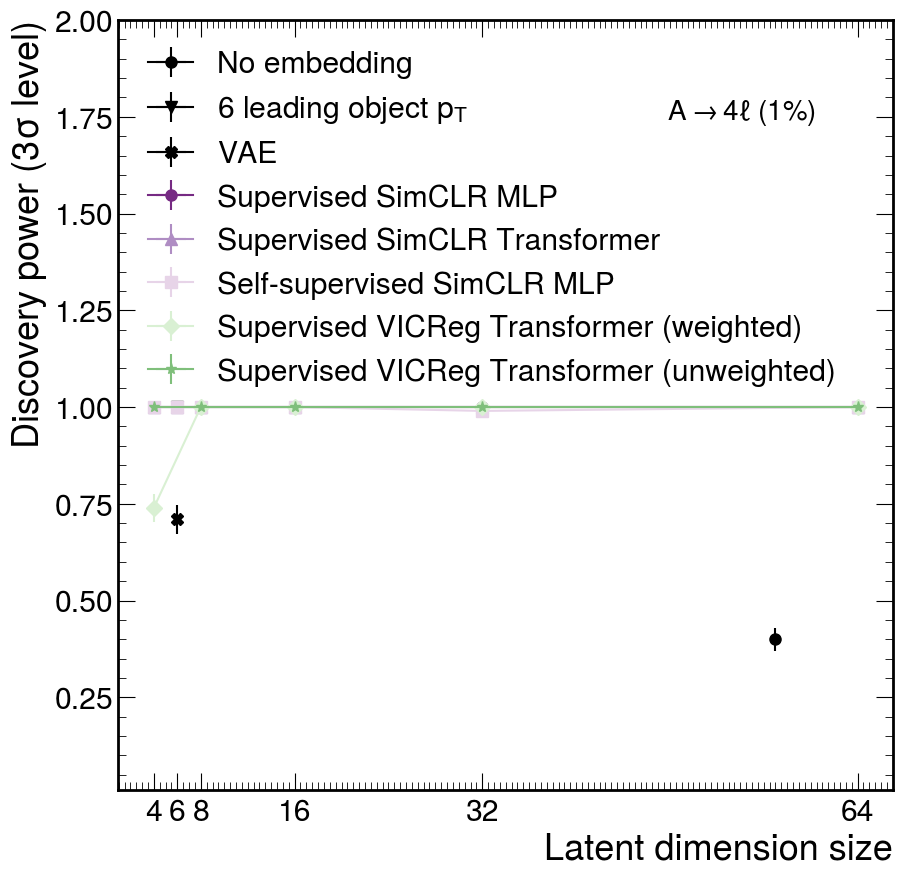

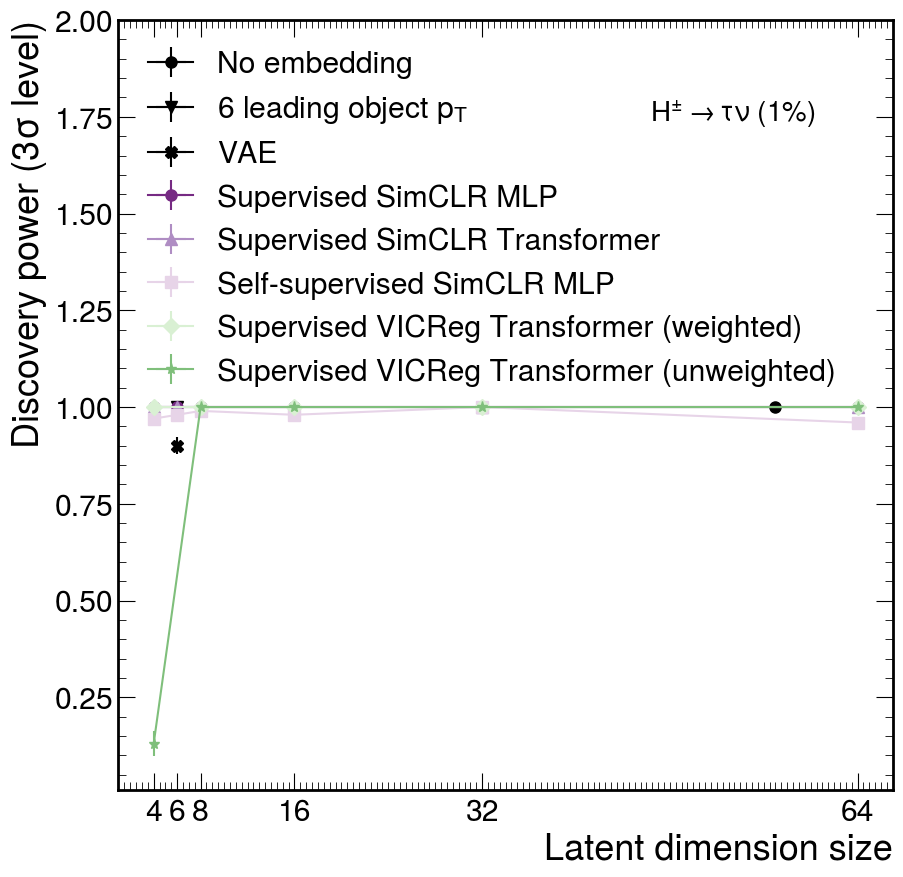

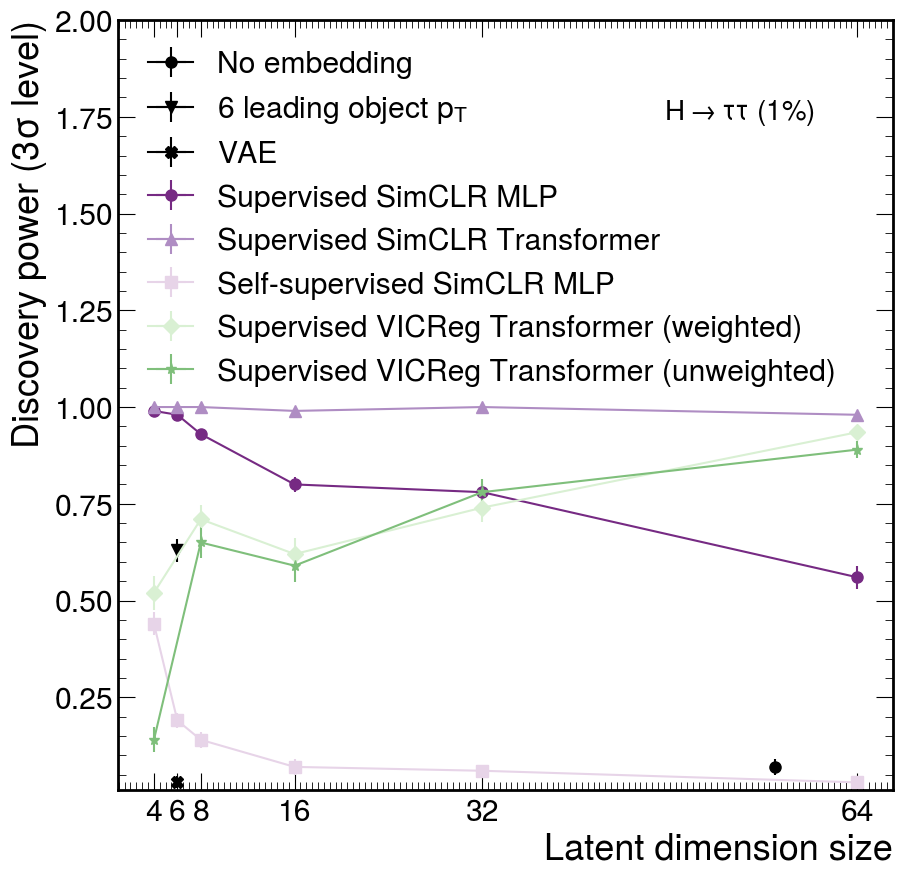

In [6]:
# Injection rate ==2 plots!

# Now do p-values for all signals! First set, signal injection column (0:0.1%, 1:0.5%, 2:1.0%)
inj_dict={0: 0.1, 1: 0.5, 2: 1}
sig_dict = {
    0: r"$LQ \rightarrow \tau b$",
    1: r"$A \rightarrow 4 \ell$",
    2: r"$H^{\pm} \rightarrow \tau \nu$",
    3: r"$H \rightarrow \tau \tau$"
}

sig = 0
inj = 2

for sig in range(0,4):
    # for inj in range(0,3):

        fig, ax = plt.subplots()
        plt.errorbar(57, p1["pvals"][0, sig, inj, 0], p1["pvals"][0, sig, inj, 1], p1["pvals"][0, sig, inj, 2], c='black',marker='o',markersize=8, label='No embedding')
        plt.errorbar(6,  p2["pvals"][0, sig, inj, 0], p2["pvals"][0, sig, inj, 1], p2["pvals"][0, sig, inj, 2], c='black',marker='v',markersize=8, label='6 leading object $p_T$')
        plt.errorbar(6,  p6["pvals"][:, sig, inj, 0], p6["pvals"][:, sig, inj, 1], p6["pvals"][:, sig, inj, 2], c='black',marker='X',markersize=8, label='VAE')
        plt.errorbar(p3["embedding"], p3["pvals"][:, sig, inj, 0], p3["pvals"][:, sig, inj, 1], p3["pvals"][:, sig, inj, 2], c=colors[0],marker=markers[0],markersize=8, label='Supervised SimCLR MLP')
        plt.errorbar(p4["embedding"], p4["pvals"][:, sig, inj, 0], p4["pvals"][:, sig, inj, 1], p4["pvals"][:, sig, inj, 2], c=colors[1],marker=markers[1],markersize=8, label='Supervised SimCLR Transformer')
        plt.errorbar(p5["embedding"], p5["pvals"][:, sig, inj, 0], p5["pvals"][:, sig, inj, 1], p5["pvals"][:, sig, inj, 2], c=colors[2],marker=markers[2],markersize=8, label='Self-supervised SimCLR MLP')
        plt.errorbar(p7["embedding"], p7["pvals"][:, sig, inj, 0], np.abs(p7["pvals"][:, sig, inj, 1]), np.abs(p7["pvals"][:, sig, inj, 2]), c=colors[3],marker=markers[3],markersize=8, label='Supervised VICReg Transformer (weighted)')
        plt.errorbar(p8["embedding"], p8["pvals"][:, sig, inj, 0], np.abs(p8["pvals"][:, sig, inj, 1]), np.abs(p8["pvals"][:, sig, inj, 2]), c=colors[4],marker=markers[4],markersize=8, label='Supervised VICReg Transformer (unweighted)')
        
        plt.text(0.9, 0.9, 
                transform=ax.transAxes,  # Use relative coordinates
                s=fr"{sig_dict[sig]} ({inj_dict[inj]}%)", 
                fontsize=20, 
                color="black", 
                ha="right", va="top"
                )
        plt.ylim(0.01,2.0)
        plt.xlabel('Latent dimension size')
        plt.ylabel('Discovery power ($3\sigma$ level)')
        plt.xticks(l1["embedding"])
        # plt.semilogy()
        plt.legend(loc='upper left')
        plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}.pdf", format="pdf")
        plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}.png", format="png")



/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


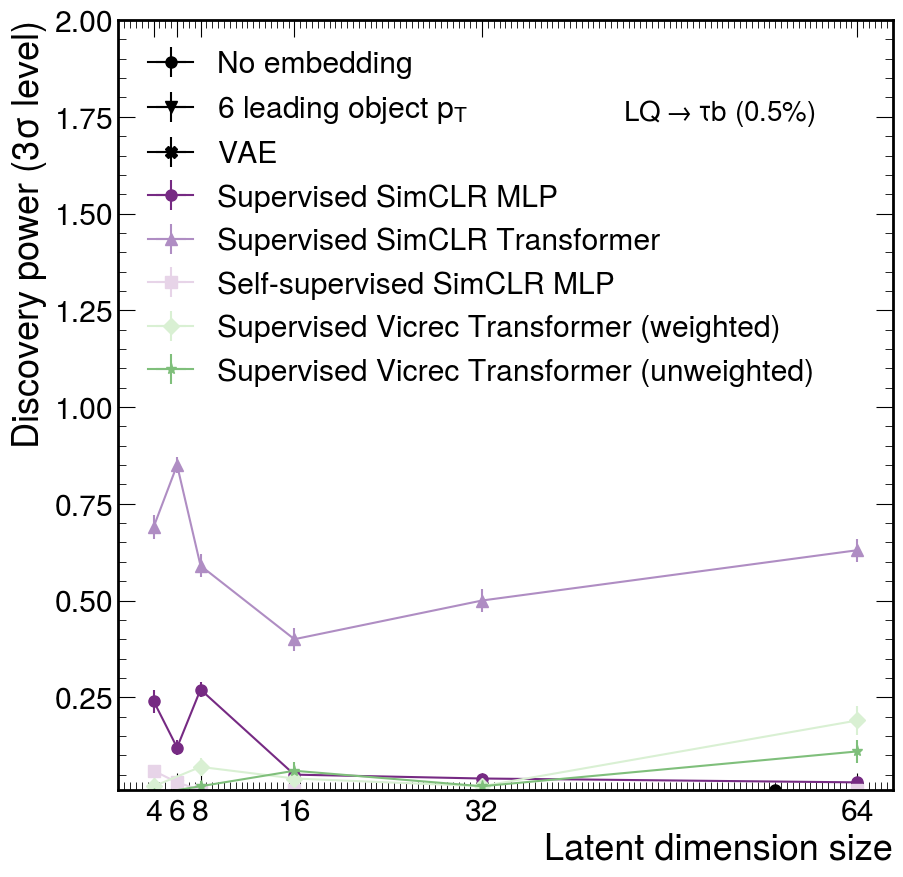

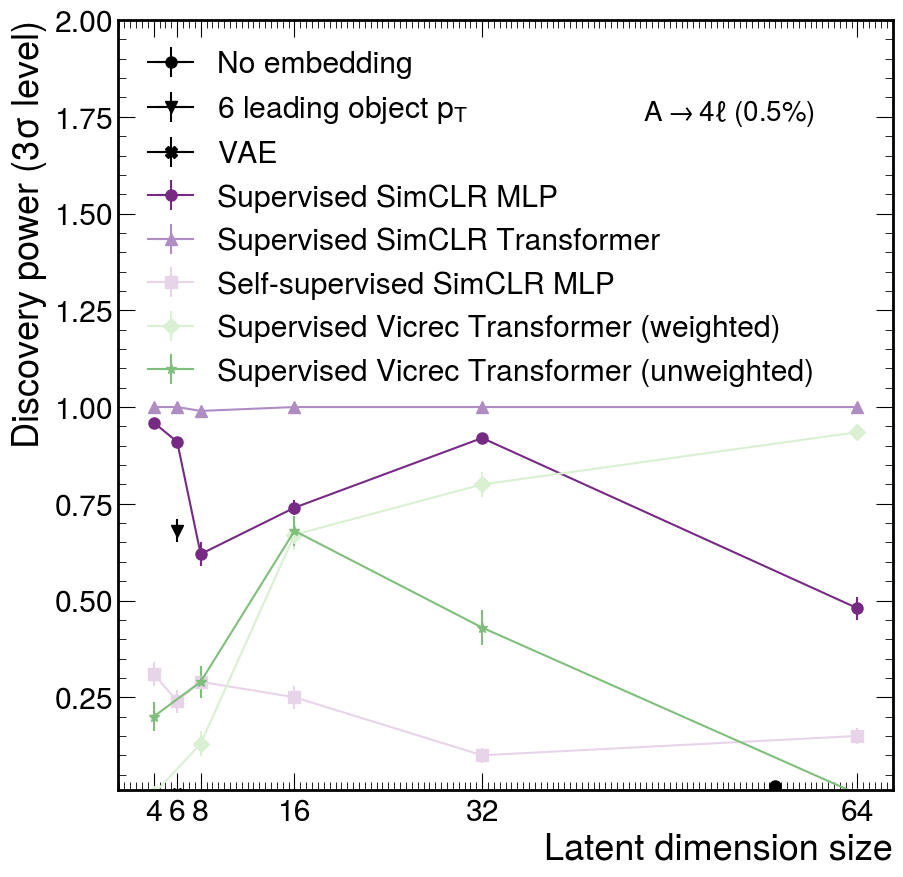

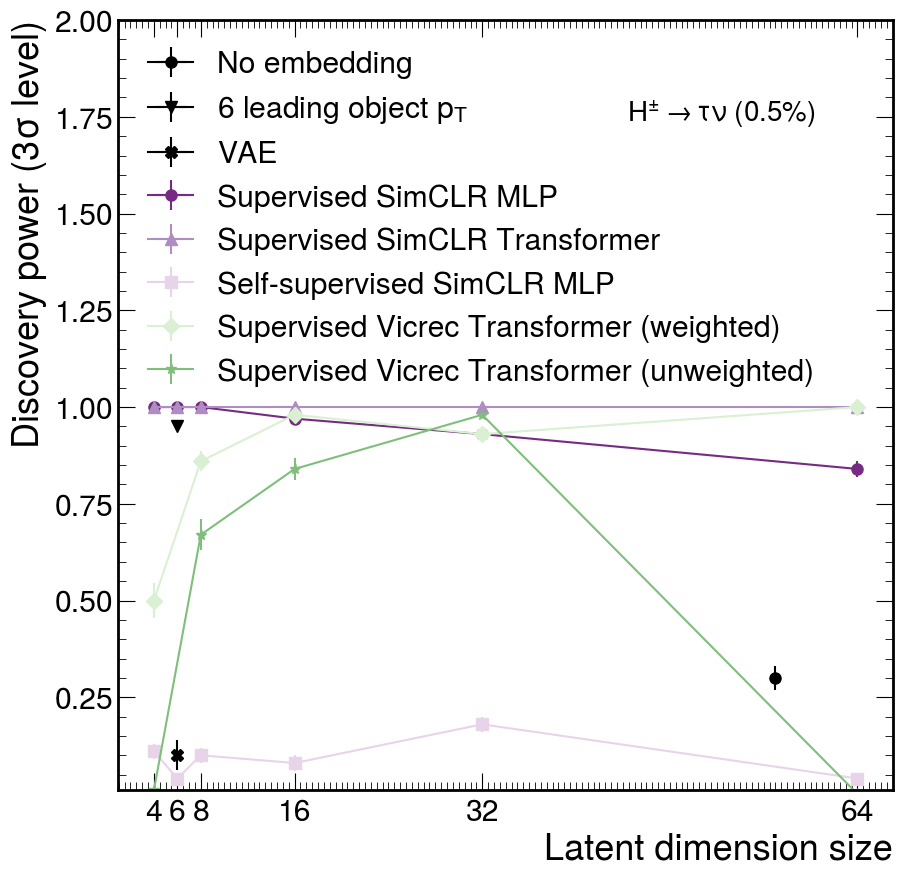

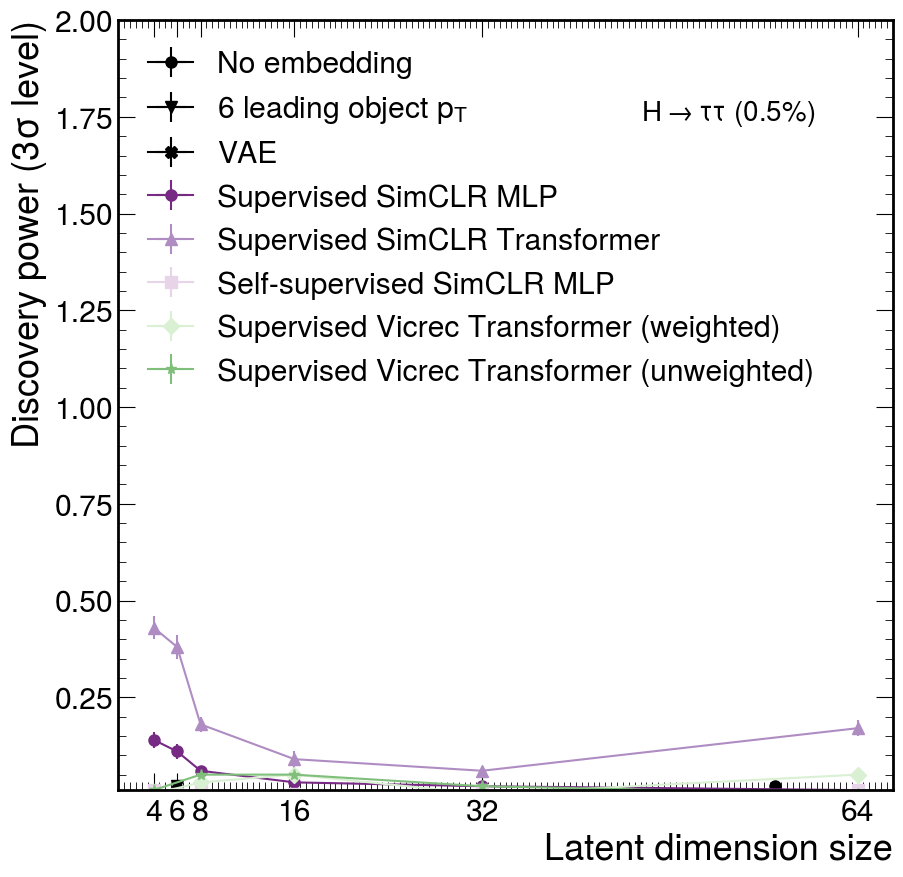

In [7]:
# Injection rate ==1 plots!

# Now do p-values for all signals! First set, signal injection column (0:0.1%, 1:0.5%, 2:1.0%)
inj_dict={0: 0.1, 1: 0.5, 2: 1}
sig_dict = {
0: r"$LQ \rightarrow \tau b$",
1: r"$A \rightarrow 4 \ell$",
2: r"$H^{\pm} \rightarrow \tau \nu$",
3: r"$H \rightarrow \tau \tau$"
}

sig = 3
inj = 1

for sig in range(0,4):
# for inj in range(0,3):

    fig, ax = plt.subplots()
    plt.errorbar(57, p1["pvals"][0, sig, inj, 0], p1["pvals"][0, sig, inj, 1], p1["pvals"][0, sig, inj, 2], c='black',marker='o',markersize=8, label='No embedding')
    plt.errorbar(6,  p2["pvals"][0, sig, inj, 0], p2["pvals"][0, sig, inj, 1], p2["pvals"][0, sig, inj, 2], c='black',marker='v',markersize=8, label='6 leading object $p_T$')
    plt.errorbar(6,  p6["pvals"][:, sig, inj, 0], p6["pvals"][:, sig, inj, 1], p6["pvals"][:, sig, inj, 2], c='black',marker='X',markersize=8, label='VAE')
    plt.errorbar(p3["embedding"], p3["pvals"][:, sig, inj, 0], p3["pvals"][:, sig, inj, 1], p3["pvals"][:, sig, inj, 2], c=colors[0],marker=markers[0],markersize=8, label='Supervised SimCLR MLP')
    plt.errorbar(p4["embedding"], p4["pvals"][:, sig, inj, 0], p4["pvals"][:, sig, inj, 1], p4["pvals"][:, sig, inj, 2], c=colors[1],marker=markers[1],markersize=8, label='Supervised SimCLR Transformer')
    plt.errorbar(p5["embedding"], p5["pvals"][:, sig, inj, 0], p5["pvals"][:, sig, inj, 1], p5["pvals"][:, sig, inj, 2], c=colors[2],marker=markers[2],markersize=8, label='Self-supervised SimCLR MLP')
    plt.errorbar(p7["embedding"], p7["pvals"][:, sig, inj, 0], np.abs(p7["pvals"][:, sig, inj, 1]), np.abs(p7["pvals"][:, sig, inj, 2]), c=colors[3],marker=markers[3],markersize=8, label='Supervised Vicrec Transformer (weighted)')
    plt.errorbar(p8["embedding"], p8["pvals"][:, sig, inj, 0], np.abs(p8["pvals"][:, sig, inj, 1]), np.abs(p8["pvals"][:, sig, inj, 2]), c=colors[4],marker=markers[4],markersize=8, label='Supervised Vicrec Transformer (unweighted)')

    plt.text(0.9, 0.9, 
        transform=ax.transAxes,  # Use relative coordinates
        s=fr"{sig_dict[sig]} ({inj_dict[inj]}%)", 
        fontsize=20, 
        color="black", 
        ha="right", va="top"
        )
    # plt.ylim(0.001,1.9)
    plt.ylim(0.01,2.0)
    plt.xlabel('Latent dimension size')
    plt.ylabel('Discovery power ($3\sigma$ level)')
    plt.xticks(l1["embedding"])
    # plt.semilogy()
    plt.legend(loc='upper left')
    plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}.pdf", format="pdf")
    plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}.png", format="png")


/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: conv

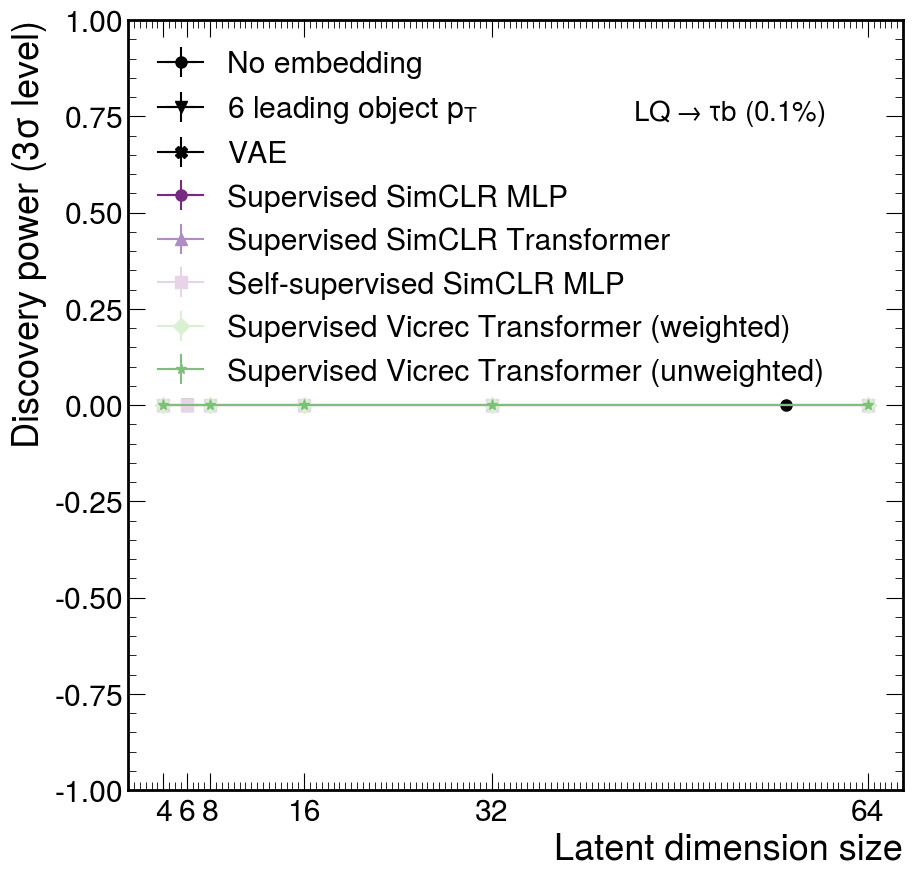

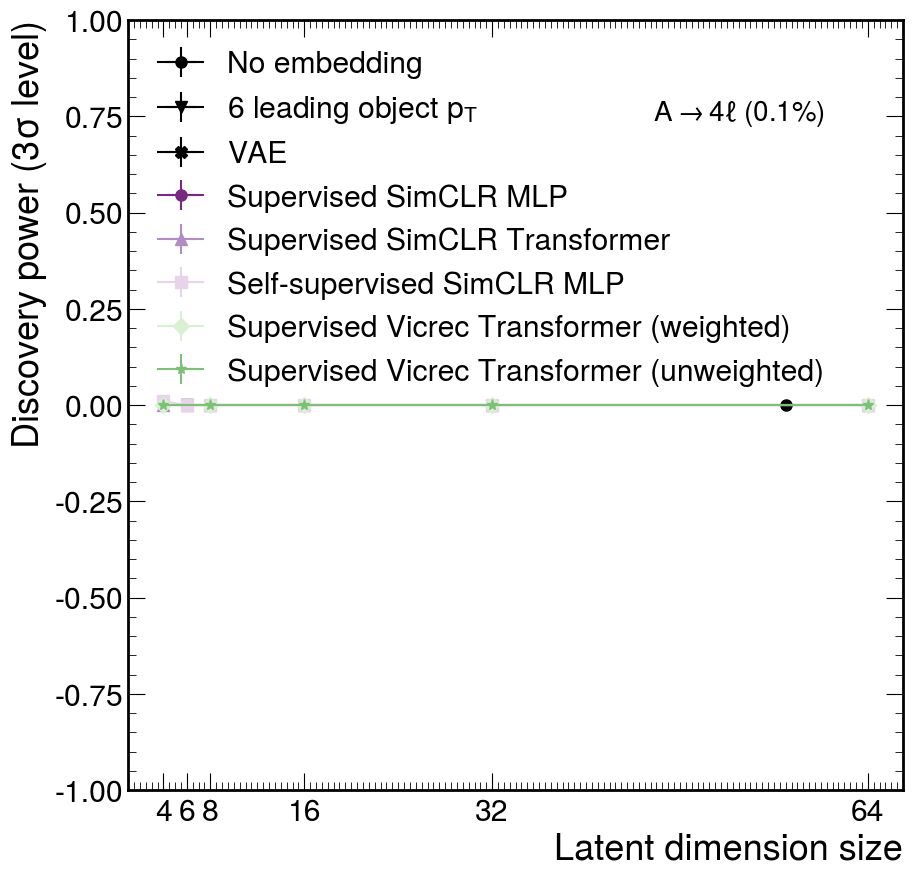

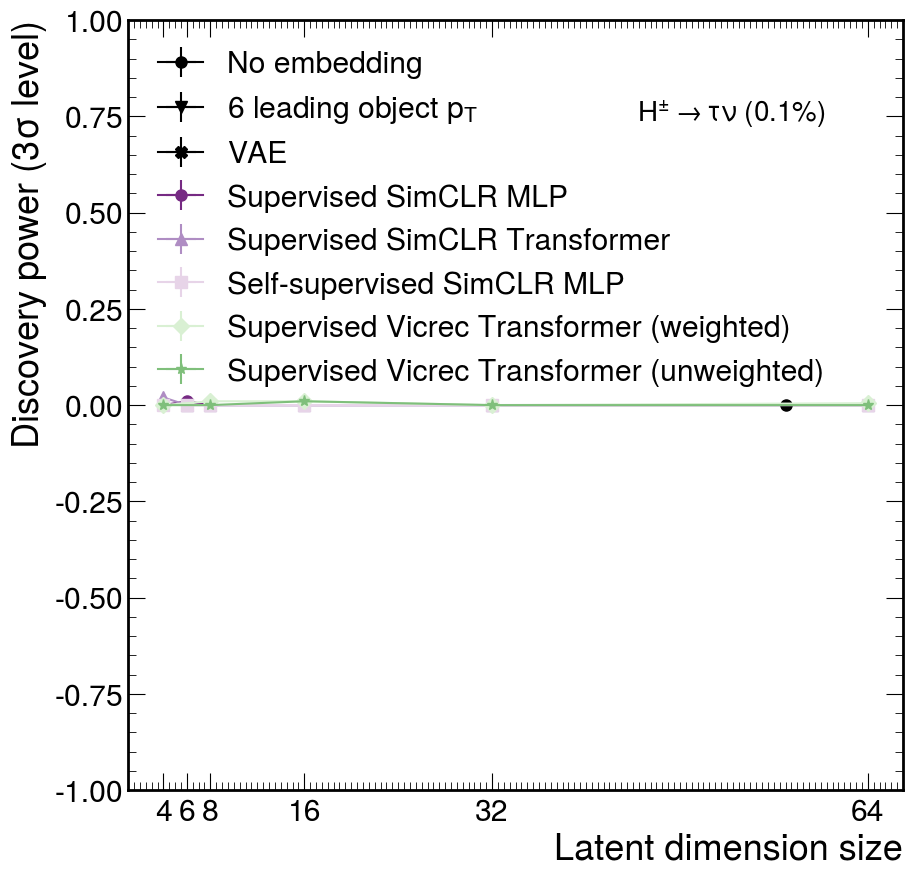

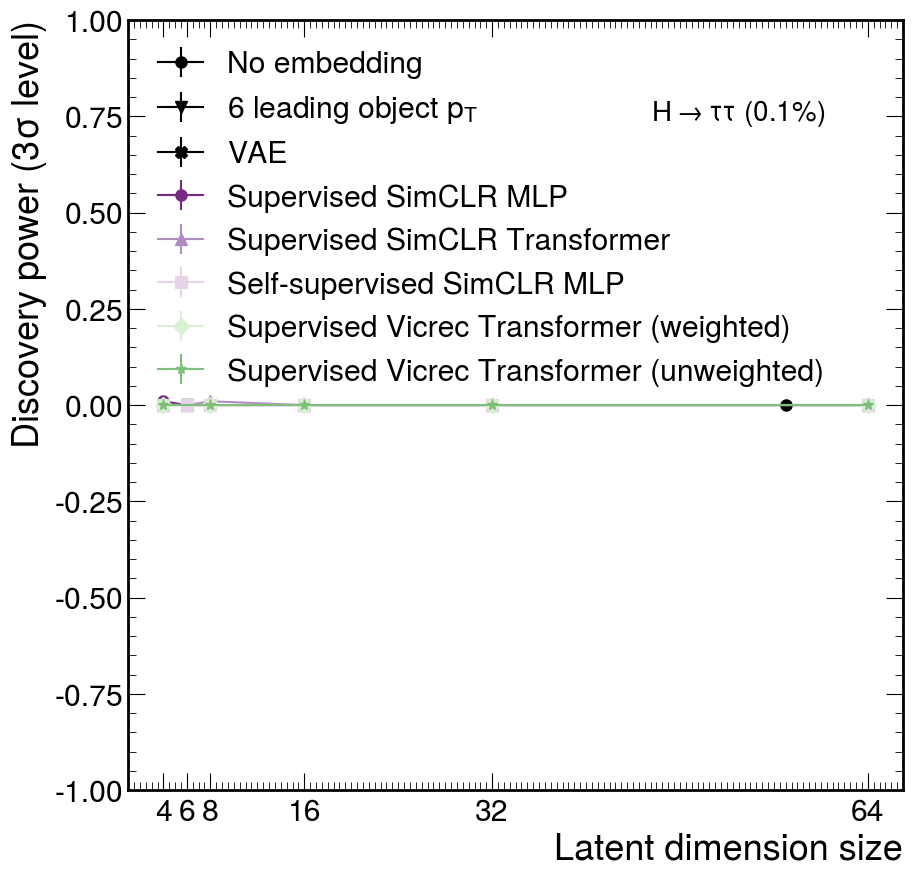

In [8]:
# Injection rate ==1 plots!

# Now do p-values for all signals! First set, signal injection column (0:0.1%, 1:0.5%, 2:1.0%)
inj_dict={0: 0.1, 1: 0.5, 2: 1}
sig_dict = {
0: r"$LQ \rightarrow \tau b$",
1: r"$A \rightarrow 4 \ell$",
2: r"$H^{\pm} \rightarrow \tau \nu$",
3: r"$H \rightarrow \tau \tau$"
}

sig = 1
inj = 0

for sig in range(0,4):
# for inj in range(0,3):

    fig, ax = plt.subplots()
    plt.errorbar(57, p1["pvals"][0, sig, inj, 0], p1["pvals"][0, sig, inj, 1], p1["pvals"][0, sig, inj, 2], c='black',marker='o',markersize=8, label='No embedding')
    plt.errorbar(6,  p2["pvals"][0, sig, inj, 0], p2["pvals"][0, sig, inj, 1], p2["pvals"][0, sig, inj, 2], c='black',marker='v',markersize=8, label='6 leading object $p_T$')
    plt.errorbar(6,  p6["pvals"][:, sig, inj, 0], p6["pvals"][:, sig, inj, 1], p6["pvals"][:, sig, inj, 2], c='black',marker='X',markersize=8, label='VAE')
    plt.errorbar(p3["embedding"], p3["pvals"][:, sig, inj, 0], p3["pvals"][:, sig, inj, 1], p3["pvals"][:, sig, inj, 2], c=colors[0],marker=markers[0],markersize=8, label='Supervised SimCLR MLP')
    plt.errorbar(p4["embedding"], p4["pvals"][:, sig, inj, 0], p4["pvals"][:, sig, inj, 1], p4["pvals"][:, sig, inj, 2], c=colors[1],marker=markers[1],markersize=8, label='Supervised SimCLR Transformer')
    plt.errorbar(p5["embedding"], p5["pvals"][:, sig, inj, 0], p5["pvals"][:, sig, inj, 1], p5["pvals"][:, sig, inj, 2], c=colors[2],marker=markers[2],markersize=8, label='Self-supervised SimCLR MLP')
    plt.errorbar(p7["embedding"], p7["pvals"][:, sig, inj, 0], np.abs(p7["pvals"][:, sig, inj, 1]), np.abs(p7["pvals"][:, sig, inj, 2]), c=colors[3],marker=markers[3],markersize=8, label='Supervised Vicrec Transformer (weighted)')
    plt.errorbar(p8["embedding"], p8["pvals"][:, sig, inj, 0], np.abs(p8["pvals"][:, sig, inj, 1]), np.abs(p8["pvals"][:, sig, inj, 2]), c=colors[4],marker=markers[4],markersize=8, label='Supervised Vicrec Transformer (unweighted)')

    plt.text(0.9, 0.9, 
        transform=ax.transAxes,  # Use relative coordinates
        s=fr"{sig_dict[sig]} ({inj_dict[inj]}%)", 
        fontsize=20, 
        color="black", 
        ha="right", va="top"
        )
    plt.ylim(-1,1)
    plt.xlabel('Latent dimension size')
    plt.ylabel('Discovery power ($3\sigma$ level)')
    plt.xticks(l1["embedding"])
    # plt.semilogy()
    plt.legend(loc='upper left')
    plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}.pdf", format="pdf")
    plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}.png", format="png")

/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/Users/thea/miniconda3/envs/mlatl1/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


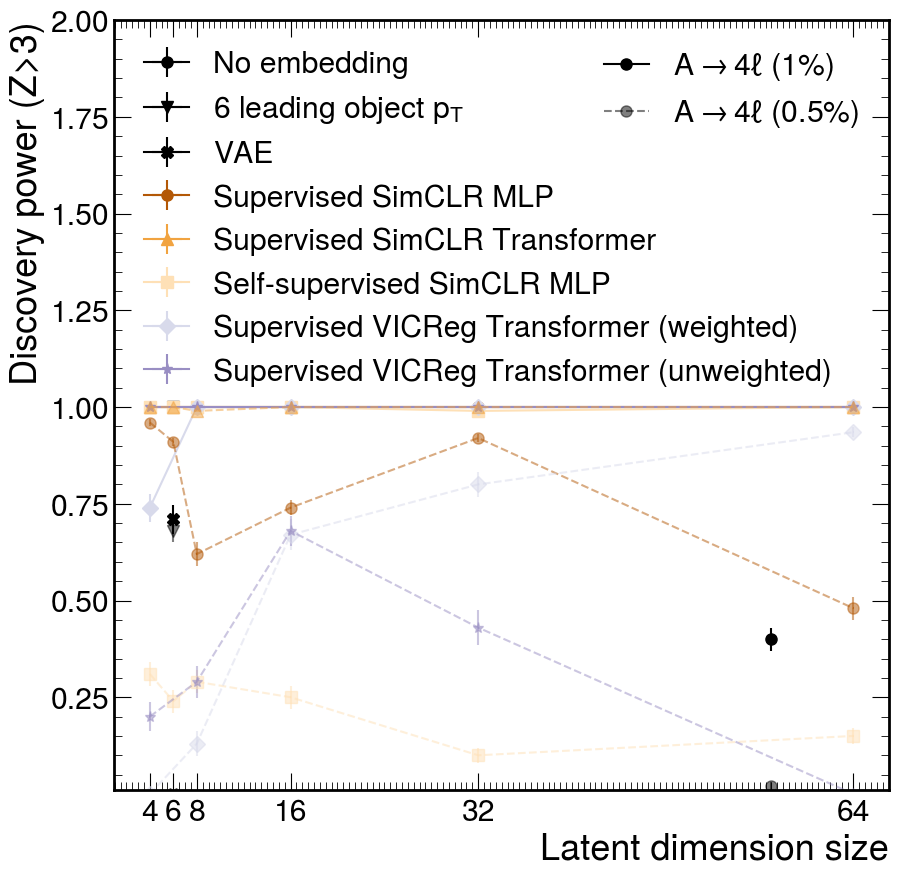

In [133]:
# Two rates for H->taunu an A4l# Injection rate ==2 plots!
from matplotlib.lines import Line2D
# Now do p-values for all signals! First set, signal injection column (0:0.1%, 1:0.5%, 2:1.0%)
inj_dict={0: 0.1, 1: 0.5, 2: 1}
sig_dict = {
    0: r"$LQ \rightarrow \tau b$",
    1: r"$A \rightarrow 4 \ell$",
    2: r"$H^{\pm} \rightarrow \tau \nu$",
    3: r"$H \rightarrow \tau \tau$"
}

sig = 1
inj = 2


fig, ax = plt.subplots()
plt.errorbar(57, p1["pvals"][0, sig, inj, 0], p1["pvals"][0, sig, inj, 1], p1["pvals"][0, sig, inj, 2], c='black',marker='o',markersize=8, label='No embedding')
plt.errorbar(6,  p2["pvals"][0, sig, inj, 0], p2["pvals"][0, sig, inj, 1], p2["pvals"][0, sig, inj, 2], c='black',marker='v',markersize=8, label='6 leading object $p_T$')
plt.errorbar(6,  p6["pvals"][:, sig, inj, 0], p6["pvals"][:, sig, inj, 1], p6["pvals"][:, sig, inj, 2], c='black',marker='X',markersize=8, label='VAE')
plt.errorbar(p3["embedding"], p3["pvals"][:, sig, inj, 0], p3["pvals"][:, sig, inj, 1], p3["pvals"][:, sig, inj, 2], c=colors[0],marker=markers[0],markersize=8, label='Supervised SimCLR MLP')
plt.errorbar(p4["embedding"], p4["pvals"][:, sig, inj, 0], p4["pvals"][:, sig, inj, 1], p4["pvals"][:, sig, inj, 2], c=colors[1],marker=markers[1],markersize=8, label='Supervised SimCLR Transformer')
plt.errorbar(p5["embedding"], p5["pvals"][:, sig, inj, 0], p5["pvals"][:, sig, inj, 1], p5["pvals"][:, sig, inj, 2], c=colors[2],marker=markers[2],markersize=8, label='Self-supervised SimCLR MLP')
plt.errorbar(p7["embedding"], p7["pvals"][:, sig, inj, 0], np.abs(p7["pvals"][:, sig, inj, 1]), np.abs(p7["pvals"][:, sig, inj, 2]), c=colors[3],marker=markers[3],markersize=8, label='Supervised VICReg Transformer (weighted)')
plt.errorbar(p8["embedding"], p8["pvals"][:, sig, inj, 0], np.abs(p8["pvals"][:, sig, inj, 1]), np.abs(p8["pvals"][:, sig, inj, 2]), c=colors[4],marker=markers[4],markersize=8, label='Supervised VICReg Transformer (unweighted)')

inj2 = 1
plt.errorbar(57, p1["pvals"][0, sig, inj2, 0], p1["pvals"][0, sig, inj2, 1], p1["pvals"][0, sig, inj2, 2], c='black',marker='o',markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(6,  p2["pvals"][0, sig, inj2, 0], p2["pvals"][0, sig, inj2, 1], p2["pvals"][0, sig, inj2, 2], c='black',marker='v',markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(6,  p6["pvals"][:, sig, inj2, 0], p6["pvals"][:, sig, inj2, 1], p6["pvals"][:, sig, inj2, 2], c='black',marker='X',markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(p3["embedding"], p3["pvals"][:, sig, inj2, 0], p3["pvals"][:, sig, inj2, 1], p3["pvals"][:, sig, inj2, 2], c=colors[0],marker=markers[0],markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(p4["embedding"], p4["pvals"][:, sig, inj2, 0], p4["pvals"][:, sig, inj2, 1], p4["pvals"][:, sig, inj2, 2], c=colors[1],marker=markers[1],markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(p5["embedding"], p5["pvals"][:, sig, inj2, 0], p5["pvals"][:, sig, inj2, 1], p5["pvals"][:, sig, inj2, 2], c=colors[2],marker=markers[2],markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(p7["embedding"], p7["pvals"][:, sig, inj2, 0], np.abs(p7["pvals"][:, sig, inj2, 1]), np.abs(p7["pvals"][:, sig, inj2, 2]), c=colors[3],marker=markers[3],markersize=8, linestyle='--', alpha=0.5)
plt.errorbar(p8["embedding"], p8["pvals"][:, sig, inj2, 0], np.abs(p8["pvals"][:, sig, inj2, 1]), np.abs(p8["pvals"][:, sig, inj2, 2]), c=colors[4],marker=markers[4],markersize=8, linestyle='--', alpha=0.5)

# Custom legend handles
custom_lines = [
    Line2D([0], [0], linestyle="-", color="black",marker='o',markersize=8 ),
    Line2D([0], [0], linestyle="--", color="black", alpha=0.5,marker='o',markersize=8)
]

label_legend = plt.legend(loc='upper left')

# Adding custom legend
custom_legend = plt.legend(custom_lines, [fr"{sig_dict[sig]} ({inj_dict[inj]}%)", fr"{sig_dict[sig]} ({inj_dict[inj2]}%)"], loc="upper right")

# plt.text(0.9, 0.9, 
#         transform=ax.transAxes,  # Use relative coordinates
#         s=fr"{sig_dict[sig]} ({inj_dict[inj]}%)", 
#         fontsize=20, 
#         color="black", 
#         ha="right", va="top"
#         )
plt.ylim(0.01,2.0)
plt.xlabel('Latent dimension size')
plt.ylabel('Discovery power (Z>3)')
plt.xticks(l1["embedding"])
# plt.semilogy()

plt.gca().add_artist(label_legend)
plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}_inj{inj2}.pdf", format="pdf")
plt.savefig(fr"../plots/pvals_sig{sig}_inj{inj}_inj{inj2}.png", format="png")